In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [4]:
n = 30
points = [Point(*np.random.randint(0, 100, 2)) for _ in range(n)]
x = list(map(lambda x: x.x, points))
y = list(map(lambda y: y.y, points))

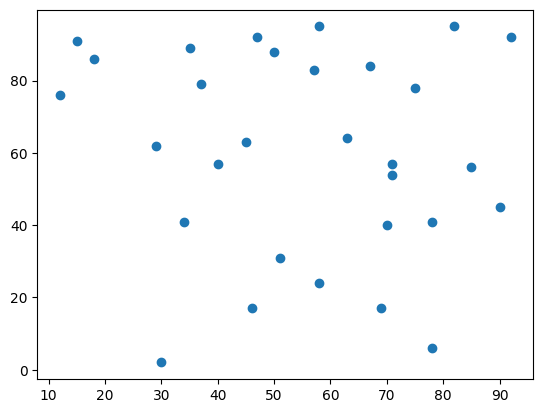

In [5]:
plt.scatter(x, y)

In [6]:
from scipy.spatial import distance


def dist(point1, point2):
    return distance.euclidean(point1, point2)

def center(points, k):
    centroids = []
    x = list(map(lambda x: x.x, points))
    y = list(map(lambda y: y.y, points))
    p_c = Point(np.mean(x), np.mean(y))
    r = 0
    for i in range(len(points)):
        d = dist(p_c, points[i])
        if r < d:
            r = d
    for i in range(k):
        x_c = p_c.x + r * np.cos(2 * np.pi * i / k)
        y_c = p_c.y + r * np.cos(2 * np.pi * i / k)
        centroids.append(Point(x_c, y_c))


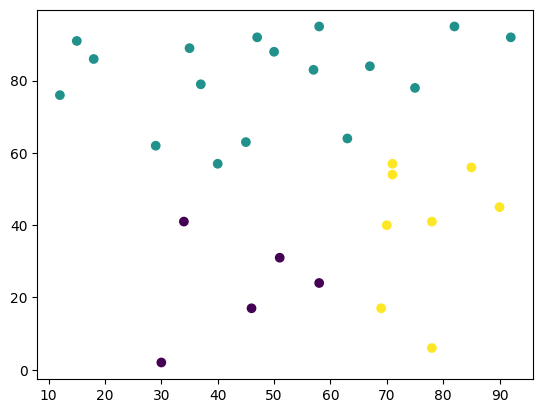

In [8]:
n = 3
contule = [(i.x, i.y) for i in points]
kmeans = KMeans(n).fit(contule)
clusters = kmeans.labels_
plt.scatter(x, y, c=clusters)